In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [3]:
# customer_country, customer_country.1 이 같음 하나 삭제
df.drop(columns=['customer_country.1'], inplace= True)
df[['it_strategic_ver', 'id_strategic_ver', 'idit_strategic_ver']] = df[['it_strategic_ver', 'id_strategic_ver', 'idit_strategic_ver']].fillna(0)
print(df.shape)
df.isnull().sum()

(59299, 28)


bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64

In [4]:
df['country'] = df['customer_country'].apply(lambda x : str(x).split('/')[-1])
df['country'].value_counts()

country
India                               16578
Brazil                               8676
United States                        3767
Mexico                               2749
Philippines                          2538
                                    ...  
1715 Forest Cove Drive,  Apt 201        1
6005 Commerce Dr. Ste. 300              1
17215 Welby Way                         1
416 Panzano Drive                       1
Manaus                                  1
Name: count, Length: 583, dtype: int64

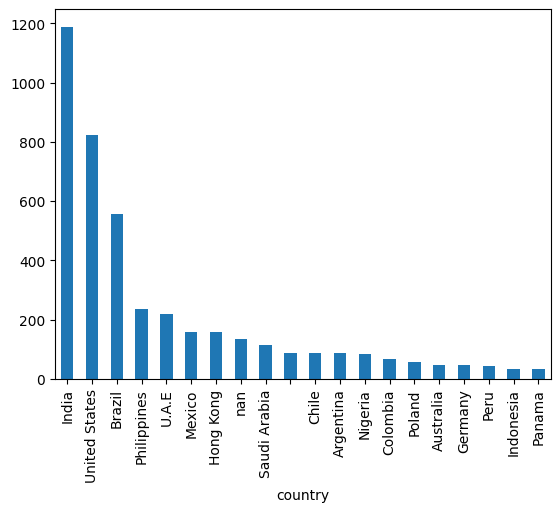

In [40]:
import matplotlib.pyplot as plt
sales_success_by_country = df[df['is_converted'] == True].groupby('country')['is_converted'].count().sort_values(ascending=False)
sales_success_by_country.head(20).plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()

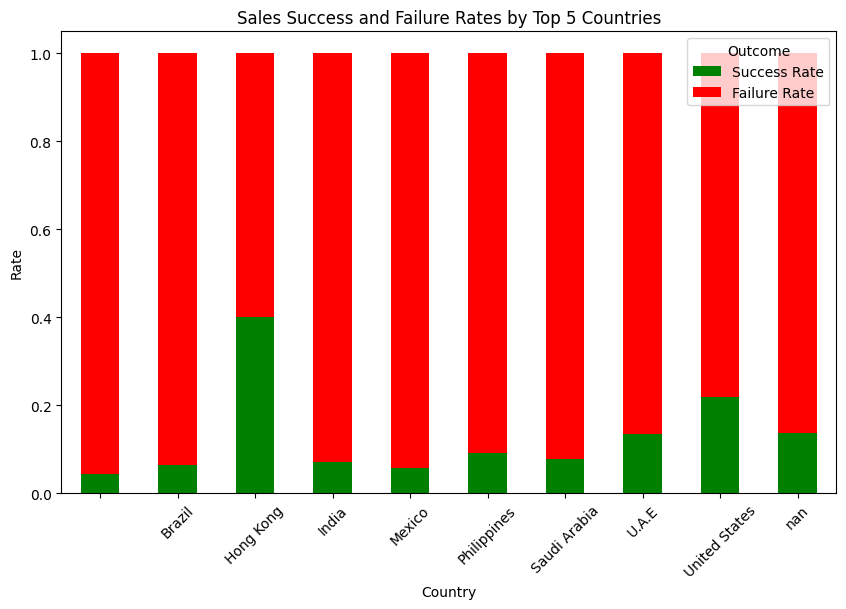

In [44]:
# 상위 5개 국가 선택
top_5_countries = sales_success_by_country.head(10).index

# 상위 5개 국가에 대한 데이터 필터링
top_5_data = df[df['country'].isin(top_5_countries)]

# 상위 5개 국가별로 영업 성공/실패 비율 계산
success_failure_by_country = top_5_data.groupby(['country', 'is_converted']).size().unstack(fill_value=0)
success_failure_by_country['Total'] = success_failure_by_country[True] + success_failure_by_country[False]
success_failure_by_country['Success Rate'] = success_failure_by_country[True] / success_failure_by_country['Total']
success_failure_by_country['Failure Rate'] = success_failure_by_country[False] / success_failure_by_country['Total']

# 시각화
success_failure_by_country[['Success Rate', 'Failure Rate']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.title('Sales Success and Failure Rates by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()


In [5]:
df['com_reg_ver_win_rate'].sort_values(ascending=True) # 결측치를 0으로 대입해도 될까?

55417    0.003788
55231    0.003788
55230    0.003788
55229    0.003788
55228    0.003788
           ...   
59290         NaN
59292         NaN
59293         NaN
59294         NaN
59298         NaN
Name: com_reg_ver_win_rate, Length: 59299, dtype: float64

In [6]:
df['customer_idx'].value_counts().head(20)

# 25096 이 모두 영업성공이고 대부분 False가 많음

customer_idx
47466    7686
25096    2421
37680     367
18030     331
21321     162
33350     135
43395      91
25309      90
33763      88
32240      84
37654      76
31864      71
37657      67
19804      65
29370      61
40344      59
21389      51
7195       50
37399      45
42067      43
Name: count, dtype: int64

In [56]:
# 영업 많은 상위 5개 customer_idx 선택
top_5_customers = df['customer_idx'].value_counts().index[:5]

# 상위 5개 customer_idx에 대한 데이터 필터링
top_5_customers_data = df[df['customer_idx'].isin(top_5_customers)][['customer_idx','is_converted']]
top_5_customers_data

,customer_idx,is_converted
50,47466,False
151,47466,False
405,25096,True
408,25096,True
429,25096,True
...,...,...
58846,21321,False
58850,21321,False
59015,47466,False
59057,47466,False


In [7]:
temp = df['customer_idx'].value_counts().index[:30]
temp

Index([47466, 25096, 37680, 18030, 21321, 33350, 43395, 25309, 33763, 32240,
       37654, 31864, 37657, 19804, 29370, 40344, 21389,  7195, 37399, 42067,
       14746, 33776,   742,  6555,  1747, 46271, 21883, 37306, 40491,  4936],
      dtype='int64', name='customer_idx')

In [8]:
df['is_converted'].value_counts()

is_converted
False    54449
True      4850
Name: count, dtype: int64

In [9]:
for num in temp:
    print(df[df['customer_idx'] == num]['is_converted'].value_counts())

is_converted
False    7619
True       67
Name: count, dtype: int64
is_converted
True    2421
Name: count, dtype: int64
is_converted
False    363
True       4
Name: count, dtype: int64
is_converted
False    330
True       1
Name: count, dtype: int64
is_converted
False    161
True       1
Name: count, dtype: int64
is_converted
False    135
Name: count, dtype: int64
is_converted
False    91
Name: count, dtype: int64
is_converted
False    90
Name: count, dtype: int64
is_converted
False    88
Name: count, dtype: int64
is_converted
False    83
True      1
Name: count, dtype: int64
is_converted
False    76
Name: count, dtype: int64
is_converted
False    71
Name: count, dtype: int64
is_converted
False    65
True      2
Name: count, dtype: int64
is_converted
False    64
True      1
Name: count, dtype: int64
is_converted
False    61
Name: count, dtype: int64
is_converted
False    58
True      1
Name: count, dtype: int64
is_converted
False    50
True      1
Name: count, dtype: int64
is_converted


In [10]:
df['customer_type'].apply(lambda x : str(x).split('/')[-1]).value_counts() # 결측치가 너무 많음 어떻게 처리?

customer_type
nan                     43961
End-Customer             6647
End Customer             3996
 Influencer              2568
Channel Partner          1368
Service Partner           349
Solution Eco-Partner      146
Contractor                 52
Corporate                  31
HVAC Engineer              23
Engineer                   20
Consultant                 20
Developer                  17
Technician                 16
Home Owner                 10
Other                      10
 Director                   8
End-user                    8
Solution Provider           7
Distributor                 6
Etc.                        6
Interior Designer           5
Installer                   5
Homeowner                   5
Reseller                    5
Others                      4
System Integrator           2
Technical Assistant         1
Commercial end-user         1
 Solution Provider          1
Administrator               1
Name: count, dtype: int64

In [11]:
df['enterprise'].value_counts() # 원핫 인코딩
# df['enterprise'].map({'Enterprise' : 0, 'SMB' : 1})

enterprise
Enterprise    37783
SMB           21516
Name: count, dtype: int64

In [12]:
temp = df[['customer_idx','historical_existing_cnt']].drop_duplicates().sort_values(by = 'historical_existing_cnt', ascending=False).head(20)
temp

,customer_idx,historical_existing_cnt
26689,12698,1394.0
37045,27469,1104.0
33224,44730,900.0
25353,33971,838.0
1215,38536,666.0
11380,21681,472.0
19171,26882,406.0
29767,26882,404.0
11383,27090,390.0
1416,26110,324.0


In [13]:
for idx in temp['customer_idx']:
    print('\n id :', idx)
    print(df[df['customer_idx'] == idx]['is_converted'].value_counts())


 id : 12698
is_converted
False    1
Name: count, dtype: int64

 id : 27469
is_converted
False    1
Name: count, dtype: int64

 id : 44730
is_converted
False    4
Name: count, dtype: int64

 id : 33971
is_converted
True    5
Name: count, dtype: int64

 id : 38536
is_converted
False    4
Name: count, dtype: int64

 id : 21681
is_converted
False    5
True     2
Name: count, dtype: int64

 id : 26882
is_converted
False    3
Name: count, dtype: int64

 id : 26882
is_converted
False    3
Name: count, dtype: int64

 id : 27090
is_converted
False    1
Name: count, dtype: int64

 id : 26110
is_converted
False    2
Name: count, dtype: int64

 id : 10468
is_converted
False    2
Name: count, dtype: int64

 id : 43633
is_converted
False    6
Name: count, dtype: int64

 id : 43632
is_converted
False    2
Name: count, dtype: int64

 id : 5024
is_converted
True    1
Name: count, dtype: int64

 id : 5025
is_converted
True    2
Name: count, dtype: int64

 id : 5027
is_converted
True    1
Name: count, d

In [14]:
df['customer_job'].value_counts().head(20)

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
operations                        1961
purchasing                        1938
information technology            1937
business development              1801
consulting                        1349
arts and design                   1276
entrepreneurship                  1192
marketing                         1161
program and project management     948
others                             763
media and communication            709
healthcare services                632
product management                 573
finance                            463
accounting                         396
Name: count, dtype: int64

In [16]:
df['lead_desc_length'].describe()

count    59299.000000
mean        79.271590
std        132.551067
min          1.000000
25%          7.000000
50%         29.000000
75%         92.000000
max       1264.000000
Name: lead_desc_length, dtype: float64

In [22]:
df['inquiry_type'].apply(lambda x: str(x).lower()).value_counts().head(20) # nan : 941 상위 몇개만 해서 레이블인코딩

inquiry_type
quotation or purchase consultation    42043
sales inquiry                          9981
product information                    1237
usage or technical consultation        1180
other                                   951
nan                                     941
trainings                               434
technical consultation                  429
services                                415
request for partnership                 297
request for quotation or purchase       230
etc.                                    221
request a demo                          184
others                                  129
technical support                       110
sales                                   100
other_                                  100
quotation_or_purchase_consultation       95
request for distributorship              75
request for technical consulting         37
Name: count, dtype: int64

In [25]:
df['product_category'].value_counts().head(20)

product_category
interactive digital board    6154
vrf                          5640
multi-split                  3674
video wall signage           2029
etc.                         2018
led signage                  1895
interactive signage          1862
single-split                 1569
rac                          1447
oled signage                 1350
hotel tv                     1112
chiller                      1051
standard signage              996
medical display               962
lg one:quick series           768
monitor                       762
one:quick series              668
heating                       655
high brightness signage       477
ventilation                   420
Name: count, dtype: int64

In [62]:
df[df['historical_existing_cnt'] == df['historical_existing_cnt'].max()]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
26689,0.5,/Honolulu/United States,AS,NaN,12698,End-Customer,Enterprise,1394.0,0.0,0.0,...,LGEUS,NaN,1,0,0.001183,0.011583,retail,NaN,27,False


In [59]:
df[['customer_idx', 'historical_existing_cnt']][df['customer_idx'] == 23122]

,customer_idx,historical_existing_cnt
1,23122,12.0
13622,23122,12.0
13623,23122,12.0
57574,23122,NaN


In [58]:
df[['customer_idx', 'historical_existing_cnt']].groupby('customer_idx').

,customer_idx,historical_existing_cnt
0,32160,NaN
1,23122,12.0
2,1755,144.0
3,4919,NaN
4,17126,NaN
...,...,...
59294,33747,NaN
59295,35420,NaN
59296,19249,NaN
59297,40327,NaN


In [4]:
df['business_unit'].unique()

array(['AS', 'ID', 'IT', 'Solution', 'CM'], dtype=object)